In this notebook we are load our preprocess data which we done in our previous part and now will train the model on different linear regression algorithms



# Step 1: Import all the required libraries

- Pandas : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- Sklearn : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- Pickle : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# import all required libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import pandas as pd
import warnings
from sklearn import preprocessing
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Read preprocess csv file
df = pd.read_csv('house_df2.csv')

In [3]:
df

,Unnamed: 0,Price,SqFt,Bedrooms,Bathrooms,Offers,No,Yes,East,North,West
0,0,114300.0,1790.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
1,1,114200.0,2030.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
2,2,114800.0,1740.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,94700.0,1980.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
4,4,119800.0,2130.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
379,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
380,124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
381,125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
382,126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# Drop Unnamed: 0 column 
df = df.drop('Unnamed: 0',axis=1)



In [5]:
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,No,Yes,East,North,West
0,114300.0,1790.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
1,114200.0,2030.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
2,114800.0,1740.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,94700.0,1980.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
4,119800.0,2130.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Step 2: Data Preparation

Goal:-
Tasks we are going to in this step

- Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
- Split dataset into train and test dataset
- Scaling on train dataset


# 1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.

In [6]:
# Spearate target and feature column in X and y variable
target = 'Price'
X = df.drop(target,axis=1)
y = df[target]

In [7]:
# Check the shape of X and y variable
X.shape, y.shape

((384, 9), (384,))

In [8]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [9]:
# Again check the shape of X and y variable
X.shape, y.shape

((384, 9), (384, 1))

In [10]:
X

,SqFt,Bedrooms,Bathrooms,Offers,No,Yes,East,North,West
0,1790.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
1,2030.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
2,1740.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1980.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
4,2130.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
379,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
y

array([[114300.],
       [114200.],
       [114800.],
       [ 94700.],
       [119800.],
       [114600.],
       [151600.],
       [150700.],
       [119200.],
       [104000.],
       [132500.],
       [123000.],
       [102600.],
       [126300.],
       [176800.],
       [145800.],
       [147100.],
       [ 83600.],
       [111400.],
       [167200.],
       [116200.],
       [113800.],
       [ 91700.],
       [106100.],
       [156400.],
       [149300.],
       [137000.],
       [ 99300.],
       [ 69100.],
       [188000.],
       [182000.],
       [112300.],
       [135000.],
       [139600.],
       [117800.],
       [117100.],
       [117500.],
       [147000.],
       [131300.],
       [108200.],
       [106600.],
       [133600.],
       [105600.],
       [154000.],
       [166500.],
       [103200.],
       [129800.],
       [ 90300.],
       [115900.],
       [107500.],
       [151100.],
       [ 91100.],
       [117400.],
       [130800.],
       [ 81300.],
       [12

# 2. Split dataset into train and test dataset
Here we are spliting our dataset into 80/20 percentage where 70% dataset goes into the training and 30% goes into testing the part.


In [12]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((268, 9), (116, 9), (268, 1), (116, 1))

# Step 3: Model Training

Goal:- In this step we are going to train our dataset on different linear regression algorithms. As we know that our target variable is in continous format so we have to apply linear regression algoritms.

**Algorithms we are going to use in this step.**

1. Linear Regression (no regularization)
2. Lasso Regression (L1 regularization)
3. Ridge Regression (L2 regularization)

**Define cross-validation folds**

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

In [14]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# 1. Linear Regression (no regularization)
*Train set cross-validation*



In [15]:
# define linear regression model object
lin_reg = LinearRegression()

In [16]:
# train or fit train dataset on linear regression model
lin_reg = lin_reg.fit(X_train, y_train)

In [17]:
# Get R2 score
lin_reg.score(X_train, y_train)

0.9827290983977538

In [18]:
# get kfold values
lr_scores = -1 * cross_val_score(lin_reg, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lr_scores

array([ 6795.97027916,  8845.57643698,  7067.666672  ,  9234.6504394 ,
       11618.88062544,  9279.17187689,  7926.78154275,  5647.68542807,
        5904.29378773, 11179.42143888])

In [19]:
# mean of the train kfold scores
lr_score_train = np.mean(lr_scores)
lr_score_train

8350.00985273205

# Predict

In [20]:
# predict the values on X_test_scaled dataset 
y_predicted = lin_reg.predict(X_test)

In [21]:
# RMSE between y_test and y_predicted values
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False) # RMSE instead of MSE
lr_score_test

9743.447113461525

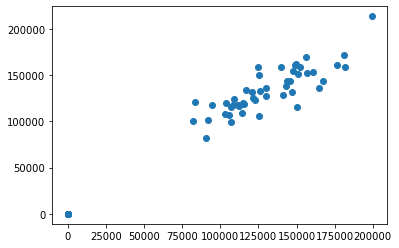

In [22]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

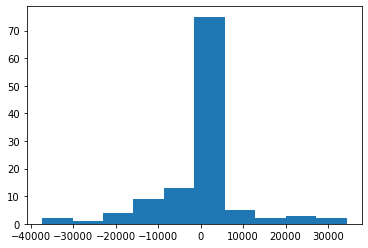

In [23]:
# histogram between y_test and y_predicted values
plt.hist(y_test - y_predicted)
plt.show()

# (2) Lasso Regression (L1 regularization)
Train set cross-validation

In [24]:
# define lasso regression model object
lasso_reg = LassoCV()

In [25]:
# train or fit train dataset on lasso regression model
lasso_reg = lasso_reg.fit(X_train, y_train)



In [26]:

# Get R2 score
lasso_reg.score(X_train, y_train)

0.9587009208740964

In [27]:
# get kfold values
lasso_scores = -1 * cross_val_score(lasso_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
lasso_scores

array([ 9721.45594559, 12835.41049569,  8298.08318411, 11451.66716148,
       18419.88920753, 13994.56894636, 11106.42624666, 14303.04835355,
       11477.36836547, 11678.18342542])

In [28]:
# mean of the train kfold scores
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

12328.61013318662

# Predict

In [29]:
# predict the values on X_test_scaled dataset 
y_predicted = lasso_reg.predict(X_test)


In [30]:
# RMSE between y_test and y_predicted values
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lasso_score_test

13973.890972433192

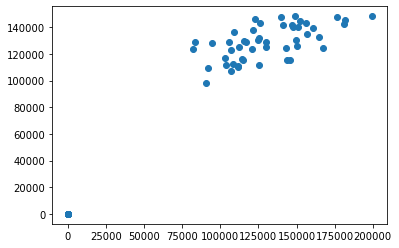

In [31]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

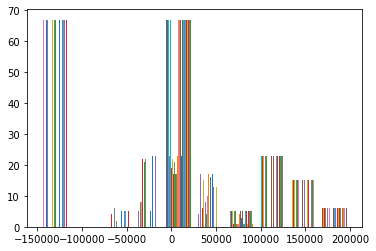

In [32]:
# histogram between y_test and y_predicted values
plt.hist(y_test - y_predicted)
plt.show()

# (3) Ridge Regression (L2 regularization)
Train set cross-validation



In [33]:
# define Ridge regression model object
ridge_reg = RidgeCV()



In [34]:
# train or fit train dataset on linear regression model
ridge_reg = ridge_reg.fit(X_train, y_train)

In [35]:
# Get R2 score
ridge_reg.score(X_train, y_train)

0.982559142517035

In [36]:
# get kfold values
ridge_scores = -1 * cross_val_score(ridge_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
ridge_scores

array([ 6690.72659805,  8160.6569589 ,  6890.69480215,  8926.08705745,
       11864.40982541,  9426.11308461,  8056.01400251,  5720.53922099,
        6221.09836959, 11225.4530372 ])

In [37]:
# mean of the train kfold scores
ridge_score_train = np.mean(ridge_scores)
ridge_score_train

8318.17929568603

# Predict

In [38]:
# predict the values on X_test_scaled dataset 
y_predicted = ridge_reg.predict(X_test)

In [39]:
# RMSE between y_test and y_predicted values
ridge_score_test = mean_squared_error(y_test, y_predicted, squared=False)
ridge_score_test

9712.230719743187

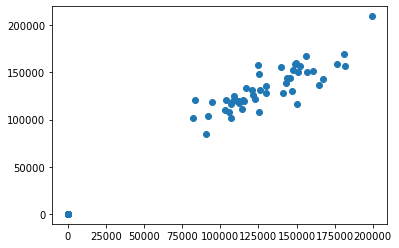

In [40]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

# Evaluation:

In [41]:
train_metrics = np.array([round(lr_score_train,3), 
                          round(lasso_score_train,3), 
                          round(ridge_score_train,3)]) 
train_metrics = pd.DataFrame(train_metrics, columns=['RMSE (Train Set)'])
train_metrics.index = ['Linear Regression', 
                       'Lasso Regression', 
                       'Ridge Regression']
train_metrics


,RMSE (Train Set)
Linear Regression,8350.010
Lasso Regression,12328.610
Ridge Regression,8318.179


In [42]:
test_metrics = np.array([round(lr_score_test,3), 
                         round(lasso_score_test,3), 
                         round(ridge_score_test,3)]) 
test_metrics = pd.DataFrame(test_metrics, columns=['RMSE (Test Set)'])
test_metrics.index = ['Linear Regression', 
                      'Lasso Regression', 
                      'Ridge Regression']
test_metrics

,RMSE (Test Set)
Linear Regression,9743.447
Lasso Regression,13973.891
Ridge Regression,9712.231


# Insight:
- A low RMSE value indicates that the simulated and observed data are close to each other showing a better accuracy. Thus lower the RMSE better is model performance.
- As You can see from above RMSE of, we will go with Lasoo Regression.(According to our dataset).
- But there is no universally “good” RMSE value. It all depends on the range of values in the dataset you’re working with.

# Step 4: Save Model
Goal:- In this step we are going to save our model in pickel format file.

In [43]:
import pickle
pickle.dump(lasso_reg, open('House_price_detect.pkl', 'wb'))

In [44]:
import pickle

def price_prediction(features):
    
    pickled_model = pickle.load(open('House_price_detect.pkl', 'rb'))
    house_price = str(round(list(pickled_model.predict(features))[0]))
    
    return str("House price maybe : $" + house_price)



In [45]:
# features or X_test
SqFt = 1500
Bedrooms = 4 
Bathrooms = 3
Offers = 0
No = 0
Yes = 1
East = 0
North = 0
West = 1

In [46]:
price_prediction([[ SqFt, Bedrooms, Bathrooms, 
                       Offers, No, Yes, East, North, West]])


'House price maybe : $97126'

# **In this step we save our model in pickel file format so we can use it now anywhere for prediction purpose**


